In [1]:
import sys
import os
import pprint
app_path = os.path.join(os.path.expanduser('~/sandbox/doberman/'))
sys.path.append(app_path)
from doberman import Stock
from doberman import BolBands
from doberman import Simulation
from doberman import DoberPlot

In [2]:
# Create 'stock_obj'
ticker = 'spy'
stock = Stock(ticker)
stock.load_data()
stock.snip_dates('2021-01-01', '2021-12-31')

In [3]:
%%time
# Calculate Bollinger Bands signal
bb_signal = BolBands(stock)

CPU times: user 65.7 ms, sys: 2.63 ms, total: 68.3 ms
Wall time: 68.7 ms


In [4]:
%%time
# Run simulation
sim = Simulation(bb_signal.stock_obj)
sim.paper_trade()

CPU times: user 3.9 s, sys: 121 ms, total: 4.02 s
Wall time: 4.07 s


In [5]:
bb_signal.stock_obj.signal[bb_signal.stock_obj.signal < 0]

2021-05-12   -1.0
2021-09-21   -1.0
2021-11-26   -1.0
2021-12-01   -1.0
dtype: float64

In [6]:
sim.calc_pnl()

spy simulation PnL: $101,510


In [7]:
doberplot = DoberPlot(stock)

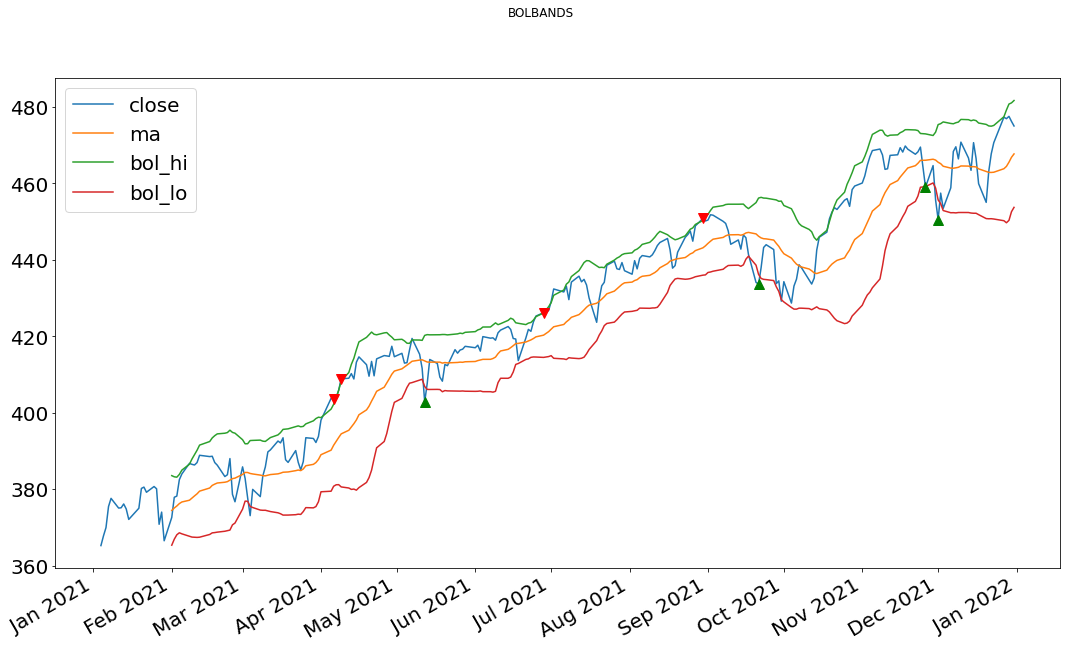

In [8]:
doberplot.order_signal(strategy_name='bolbands')